In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [2]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
sns.set_palette(sns.color_palette("muted"))


df = pd.read_csv("../datafiles/data/netflix_titles.csv",index_col='title')
df.drop(['duration'],axis=1)

,show_id,type,director,cast,country,date_added,release_year,rating,listed_in,description
title,,,,,,,,,,
Norm of the North: King Sized Adventure,81145628,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
Jandino: Whatever it Takes,80117401,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
Transformers Prime,70234439,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,Kids' TV,"With the help of three human allies, the Autob..."
Transformers: Robots in Disguise,80058654,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,Kids' TV,When a prison ship crash unleashes hundreds of...
#realityhigh,80125979,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,80000063,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
Maron,70286564,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
Little Baby Bum: Nursery Rhyme Friends,80116008,Movie,NaN,NaN,NaN,NaN,2016,NaN,Movies,Nursery rhymes and original music for children...


In [3]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


df.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
title,,,,,,,,,,,,,
Norm of the North: King Sized Adventure,81145628,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0
Jandino: Whatever it Takes,80117401,Movie,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0
Transformers Prime,70234439,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0
Transformers: Robots in Disguise,80058654,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0
#realityhigh,80125979,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0


# IMDb Data

In [14]:
imdb_titles=pd.read_csv('../datafiles/data/IMDb movies.csv',)
imdb_ratings=pd.read_csv('../datafiles/data/IMDb ratings.csv',usecols=['weighted_average_vote'])
ratings = pd.DataFrame({'title':imdb_titles.title,
                        'Rating': imdb_ratings.weighted_average_vote}
                    )
ratings.drop_duplicates(subset=['title','Rating'], inplace=True)
ratings.head()

ratings=ratings.set_index("title")
ratings

,Rating
title,
The Story of the Kelly Gang,6.1
Den sorte drøm,5.9
Cleopatra,5.2
L'Inferno,7.0
"From the Manger to the Cross; or, Jesus of Nazareth",5.7
...,...
Jessie,7.2
Ottam,7.8
Pengalila,8.4


In [7]:
df1=df.join(ratings,on=["title"])
df1 = df1[df1['country'].notna()]
df1 = df1[df1['Rating'].notna()]

In [8]:
df1=df1.sort_values(by='Rating', ascending=False)



number=int(0.1*len(df1))
top=df1[0:number*2] #top 20% of the movies with best ratings

In [9]:
top

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Rating
title,,,,,,,,,,,,,,
Safe,80201500,TV Show,NaN,"Michael C. Hall, Amanda Abbington, Marc Warren...",United Kingdom,2019-02-05,2018,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Internationa...","After his teenage daughter goes missing, a wid...",2019.0,2.0,9.5
Oththa Seruppu Size 7,81206389,Movie,Parthiban,Parthiban,India,2019-11-04,2019,TV-MA,103 min,"Dramas, International Movies, Thrillers","Taken into custody, a murder suspect's theatri...",2019.0,11.0,9.1
Innocent,81026192,TV Show,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,2019-01-23,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ...",2019.0,1.0,9.0
Pulp Fiction,880640,Movie,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,2019.0,1.0,8.9
The Lord of the Rings: The Return of the King,60004484,Movie,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States",2020-01-01,2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,2020.0,1.0,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Chosen,80171982,Movie,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico",2017-04-14,2016,TV-14,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",2017.0,4.0,7.1
The Lobster,80058480,Movie,Yorgos Lanthimos,"Colin Farrell, Jessica Barden, Rachel Weisz, O...","Ireland, United Kingdom, Greece, France, Nethe...",2018-12-02,2015,R,119 min,"Comedies, International Movies, Romantic Movies","In a near-future world, single people are hunt...",2018.0,12.0,7.1
Rumble,80192015,Movie,R. Ellis Frazier,"Gary Daniels, Luis Gatica, Sissi Fleitas, Eddi...",Mexico,2017-09-15,2016,TV-MA,92 min,"Action & Adventure, Independent Movies",An ex-MMA champion reduced to fixing fights in...,2017.0,9.0,7.1


In [10]:
categories = ", ".join(top['country']).split(", ")
counter_list = Counter(categories).most_common(20)
#print(counter_list)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
top_countries=pd.DataFrame(columns=['country','count'])
top_countries['country']=pd.Series(labels)
top_countries['count']=pd.Series(values)

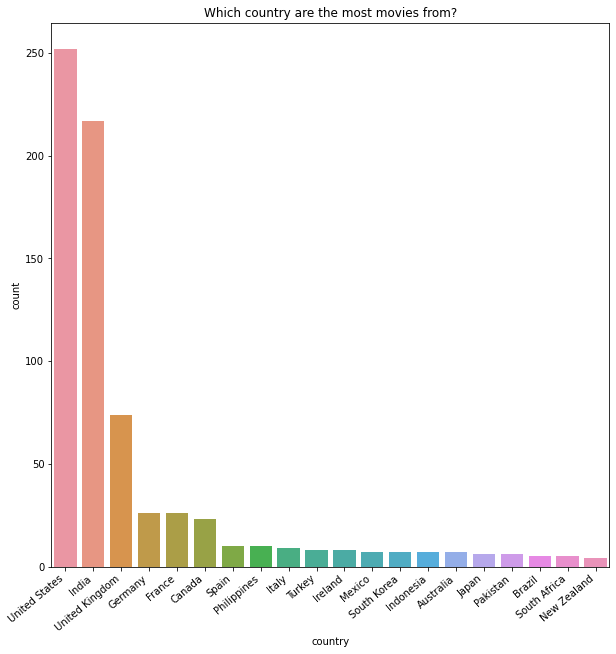

In [11]:
plt.figure(figsize=(10,10))
plt.title("Which country are the most movies from?")
plt.xlabel("Country")
plt.ylabel("Number of movies")
ax=sns.barplot(y="count",x="country",data=top_countries.sort_values(by='count',ascending=False)) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
